## This article compares pd.crosstab with pd.pivot_table in an effort to help you see how each will perform differently.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [17]:
# prepare  an empty year of data  to avoid index error

next_year = int(str(date.today())[:4]) + 1
next_year = pd.date_range(start=f"1/1/{next_year}", end=f"12/31/{next_year}")
next_year = pd.DataFrame({"Count": [0] * len(next_year)}, index=next_year)

In [18]:
# extract the columns  of interest from Invitations DataFrame

Invitations_viz = pd.DataFrame(Invitations.index)
Invitations_viz["Count"] = 1
Invitations_viz = Invitations_viz.set_index("Sent At")


In [20]:
# concatenate the Invitations_viz and next_year DataFrames
Invitations_viz = pd.concat([Invitations_viz, next_year])

In [23]:
Invitations_viz["Year"] =pd.DatetimeIndex(Invitations_viz.index).year
Invitations_viz["Month"] =pd.DatetimeIndex(Invitations_viz.index).month
Invitations_viz["DOfMonth"] =pd.DatetimeIndex(Invitations_viz.index).day
Invitations_viz["DayOfWeek"] =pd.DatetimeIndex(Invitations_viz.index).dayofweek
Invitations_viz["HourOfday"] =pd.DatetimeIndex(Invitations_viz.index).hour


In [24]:
Invitations_viz

,Count,Year,Month,DOfMonth,DayOfWeek,Hour,HourOfday
"5/4/22, 11:18 PM",1,2022,5,4,2,23,23
"5/4/22, 11:19 PM",1,2022,5,4,2,23,23
"5/4/22, 11:19 PM",1,2022,5,4,2,23,23
"5/4/22, 11:18 PM",1,2022,5,4,2,23,23
"5/4/22, 11:19 PM",1,2022,5,4,2,23,23
...,...,...,...,...,...,...,...
2023-12-27 00:00:00,0,2023,12,27,2,0,0
2023-12-28 00:00:00,0,2023,12,28,3,0,0
2023-12-29 00:00:00,0,2023,12,29,4,0,0
2023-12-30 00:00:00,0,2023,12,30,5,0,0


In [25]:
# Pandas Cross Tabulation
# From the documentation pd.crosstab() will “Compute a simple cross tabulation of two (or more) factors.”
# With the above data for example we can use pd.crosstab(Invitations_viz_viz['Year'], Invitations_viz_viz['Month'])
#  to quickly summarize posting patterns by month over the years:

pd.crosstab(Invitations_viz['Year'], Invitations_viz['Month'])



Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2021,0,0,0,0,0,0,4,6,10,62,778,1001
2022,637,470,149,709,24,0,0,0,0,0,0,0
2023,31,28,31,30,31,30,31,31,30,31,30,31


In [26]:
#  Pandas Pivot Table
# A pivot table, produces similar results — but not exactly the same. 
# The documentation for pd.pivot_table()somewhat helpfully explains it will “Create a spreadsheet-style pivot table as a DataFrame.” 
# Using pd.pivot_table(shares_viz, values='Count', index='Year', columns='Month' aggfunc='sum') we see a version of the following:

pd.pivot_table(Invitations_viz, values='Count', index='Year', columns='Month', aggfunc='sum') 





Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2021,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,10.0,62.0,778.0,1001.0
2022,637.0,470.0,149.0,709.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### The Differences
Notice how pd.crosstab() returns 0 where there are no counts while pd.pivot_table()returns a NaN where there are no counts.

Some adjustments can make the output match more closely. For example, a simple modification to pd.pivot_table()by adding the fillna(0) will replace those NaN values with 0.

<AxesSubplot:xlabel='Month', ylabel='Year'>

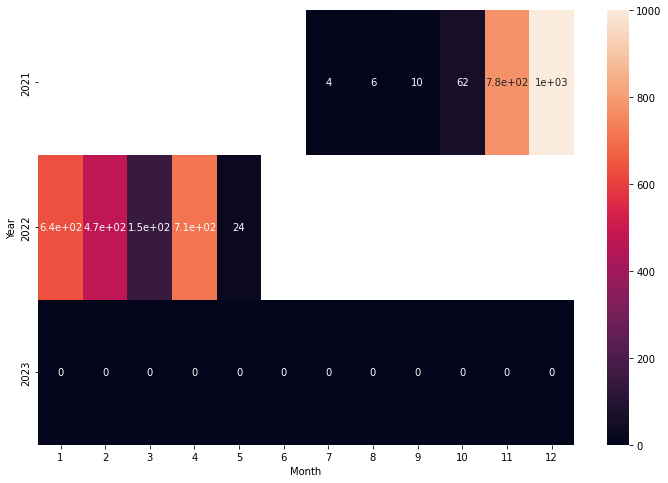

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.pivot_table(Invitations_viz, values='Count', index='Year', columns='Month', aggfunc='sum'), annot=True)

<AxesSubplot:xlabel='Month', ylabel='Year'>

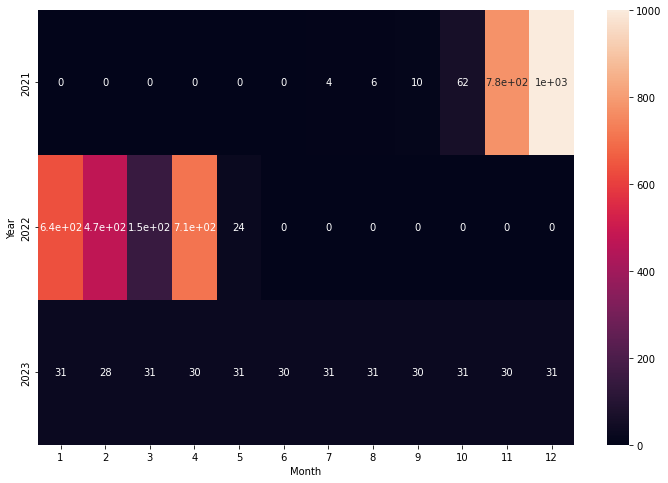

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(Invitations_viz['Year'], Invitations_viz['Month']), annot=True)